In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych//OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [3]:
X_test = images[8000:10000]
y_test = masks[8000:10000]

In [4]:
images = images[:8000]
masks = masks[:8000]

In [5]:
images.shape

(8000, 512, 512, 1)

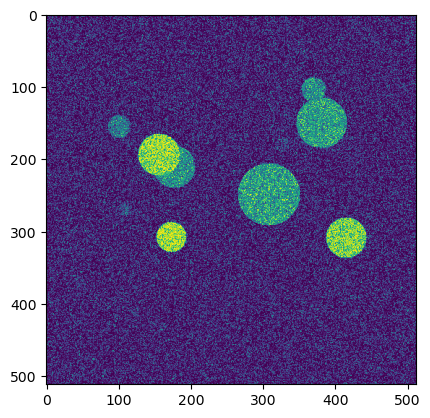

In [6]:
imshow(images[100])

In [7]:
masks.shape

(8000, 512, 512, 1)

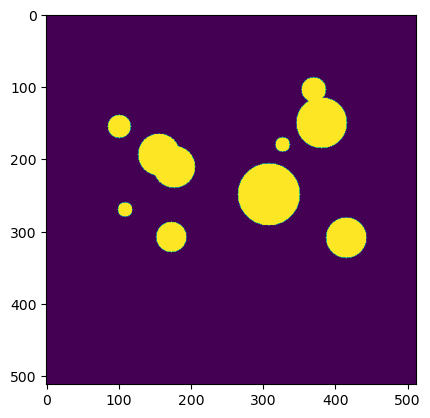

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpqzc6f1ktkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpqzc6f1ktkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_5_Example1.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
25/25 [==============================] - 32s 732ms/step - loss: 0.0597 - dice_coeff: 0.8778 - val_loss: 0.0467 - val_dice_coeff: 0.8798
Epoch 2/100
25/25 [==============================] - 17s 678ms/step - loss: 0.0430 - dice_coeff: 0.8932 - val_loss: 0.0444 - val_dice_coeff: 0.8917
Epoch 3/100
25/25 [==============================] - 17s 684ms/step - loss: 0.0419 - dice_coeff: 0.8972 - val_loss: 0.0446 - val_dice_coeff: 0.8993
Epoch 4/100
25/25 [==============================] - 17s 680ms/step - loss: 0.0429 - dice_coeff: 0.8977 - val_loss: 0.0438 - val_dice_coeff: 0.8893
Epoch 5/100
25/25 [==============================] - 17s 683ms/step - loss: 0.0421 - dice_coeff: 0.8964 - val_loss: 0.0463 - val_dice_coeff: 0.9064
Model saved to: /tmp/tmpqzc6f1ktkuc_unet2d/kuc_unet2d_0kuc_unet2d_model
History saved to: /tmp/tmpqzc6f1ktkuc_unet2d/kuc_unet2d_history_0.pkl
Testing the classifier...
Model saved to /tmp/tmpqzc6f1ktkuc_unet2d/cnnd_0

In [16]:
R.classifier_scores

[[0.045254580676555634, 0.9078235030174255],
 [0.04179544001817703, 0.89275723695755],
 [0.04506665840744972, 0.8730618357658386],
 [0.041752301156520844, 0.9008587598800659],
 [0.046488262712955475, 0.9172468185424805]]

In [17]:
R.discriminator_scores

[[0.6679812073707581, 0.893750011920929],
 [0.37872615456581116, 0.9416666626930237],
 [0.19302289187908173, 0.9750000238418579],
 [0.23059305548667908, 0.956250011920929],
 [0.7182551026344299, 0.9125000238418579]]

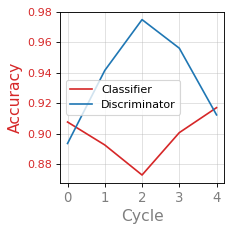

In [18]:
R.plot()

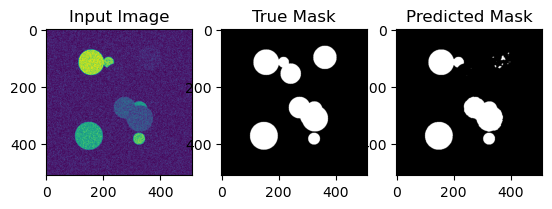

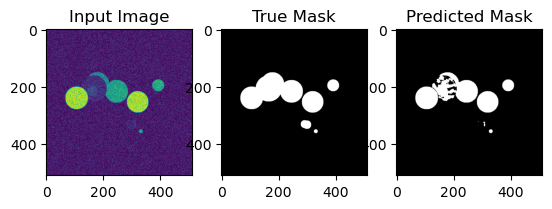

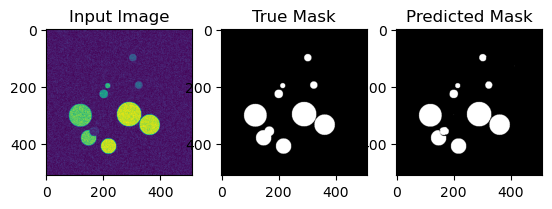

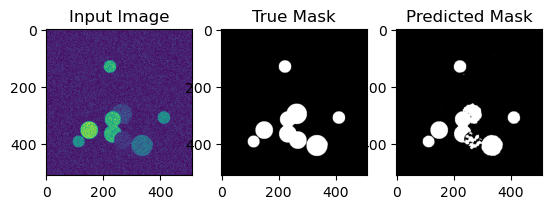

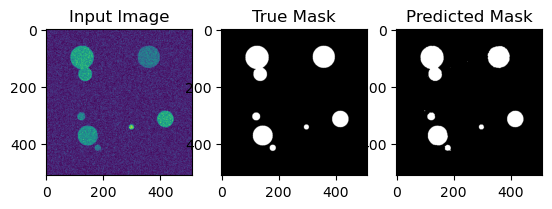

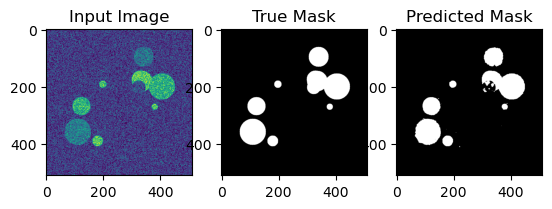

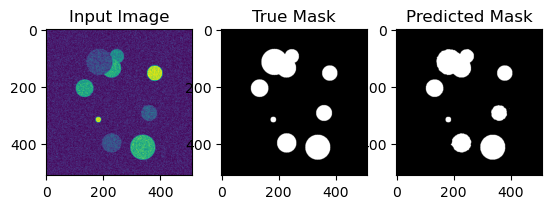

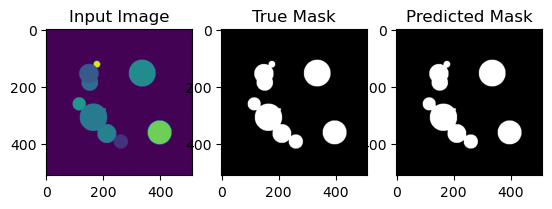

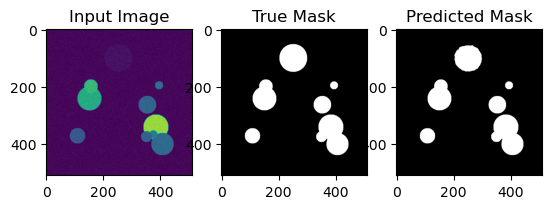

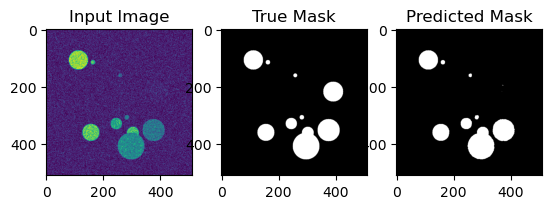

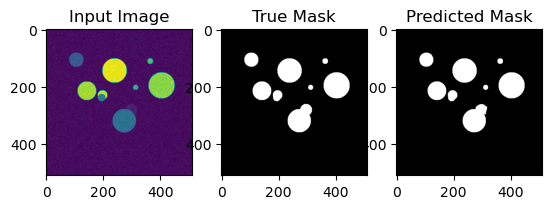

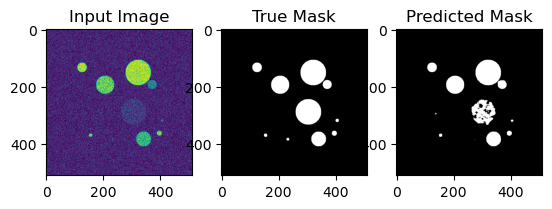

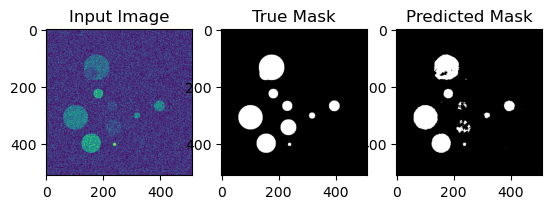

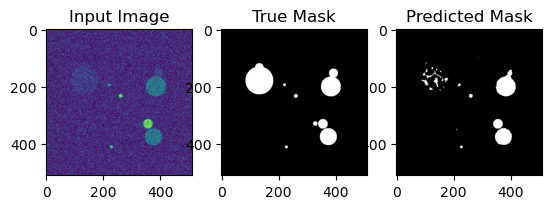

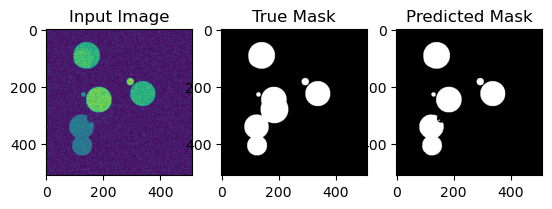

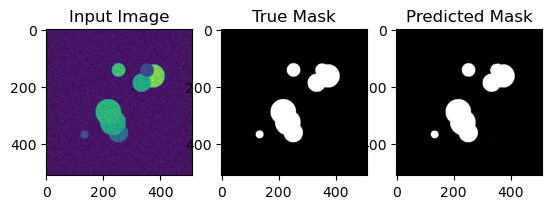

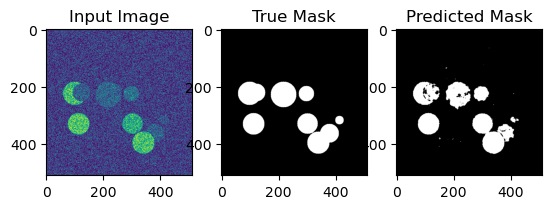

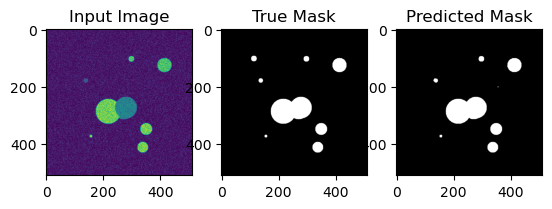

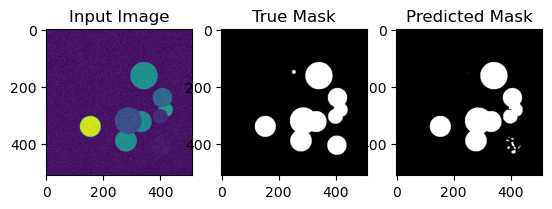

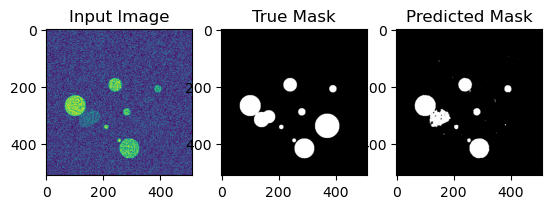

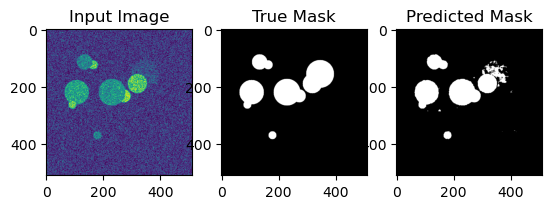

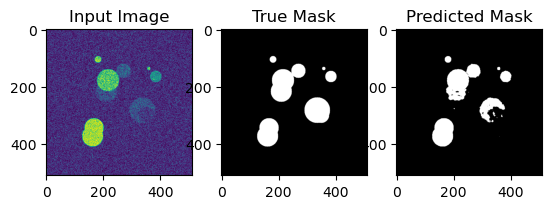

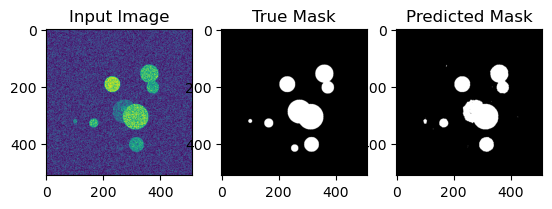

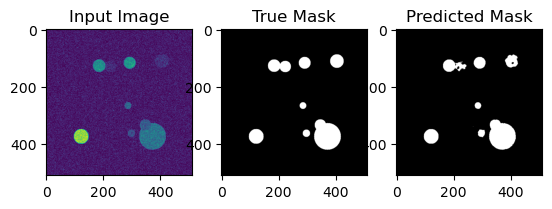

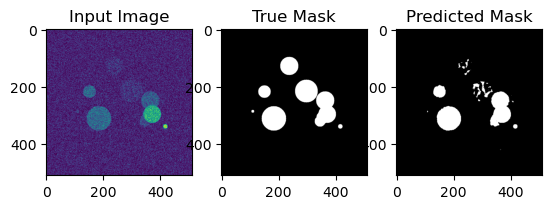

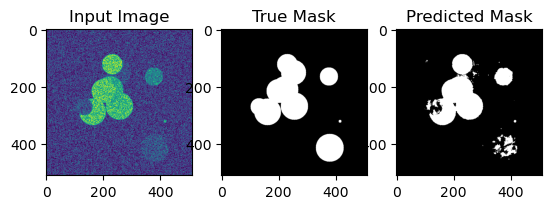

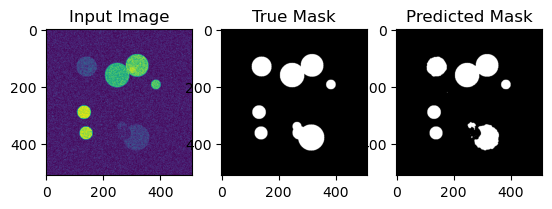

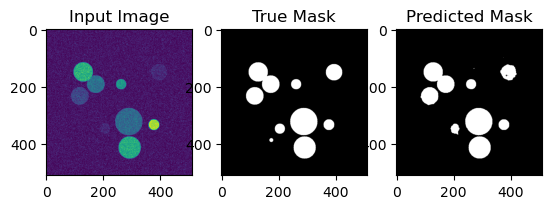

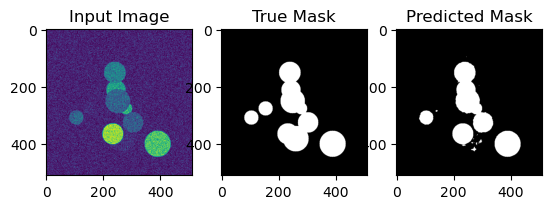

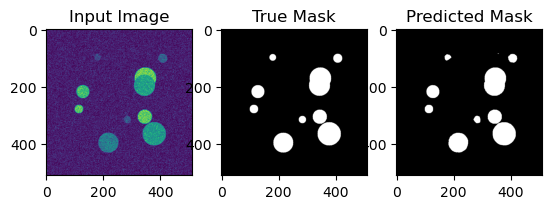

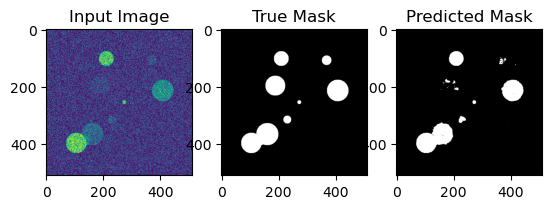

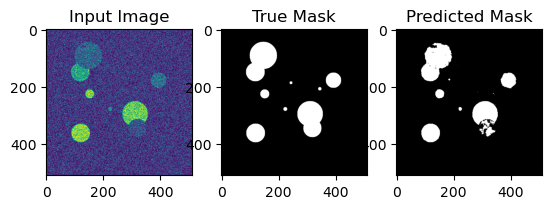

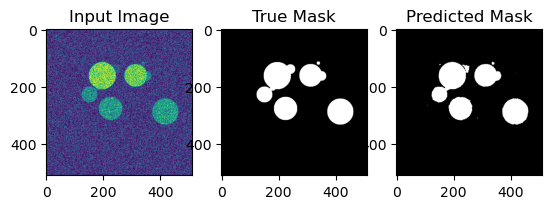

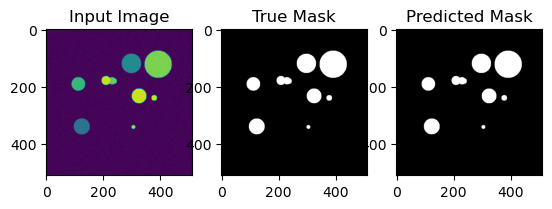

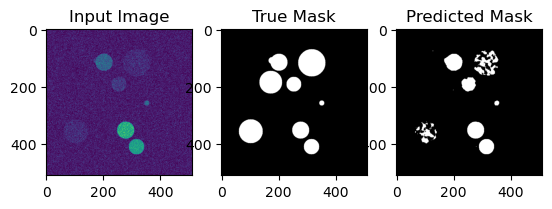

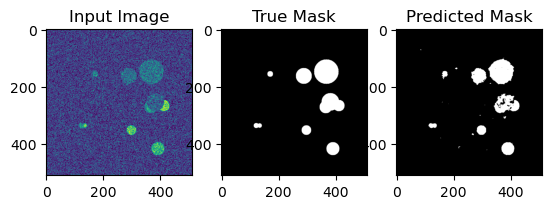

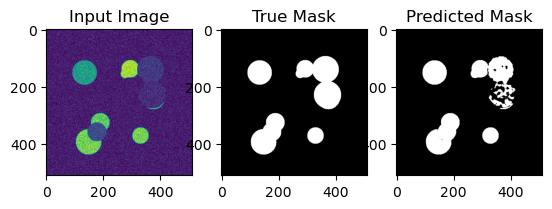

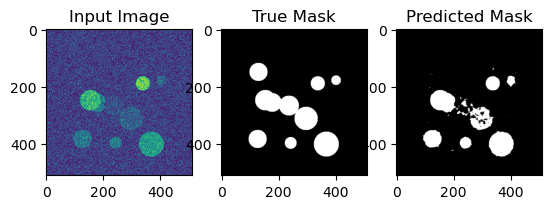

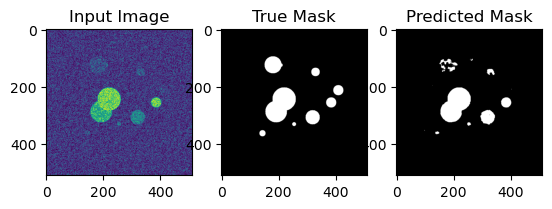

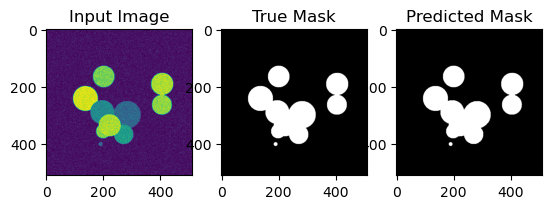

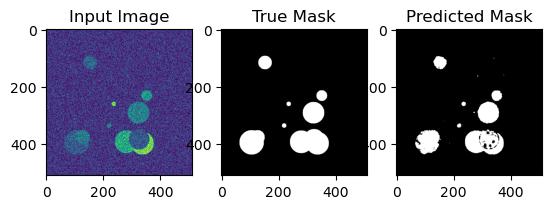

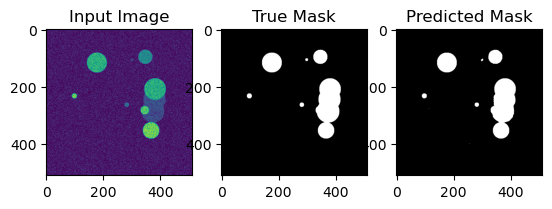

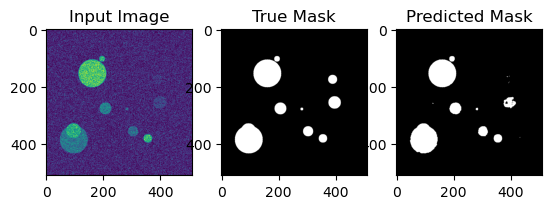

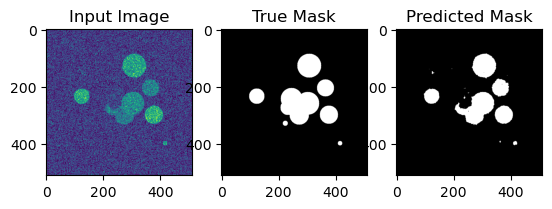

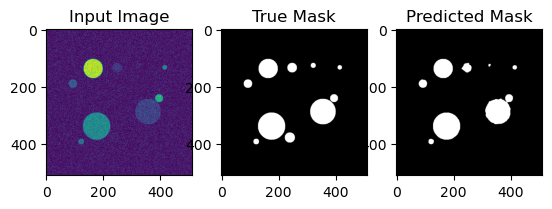

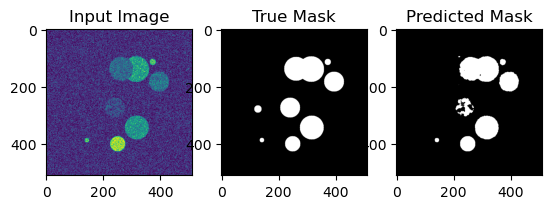

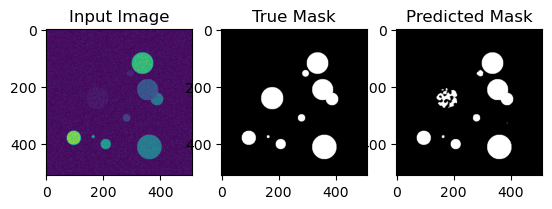

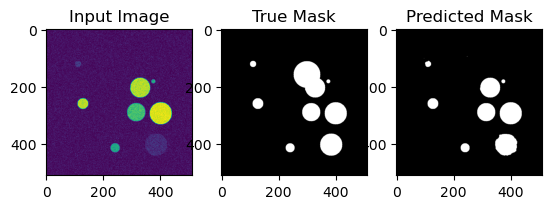

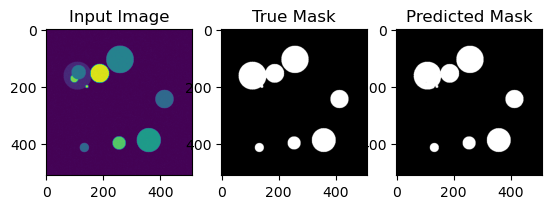

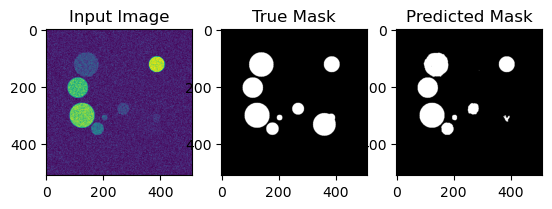

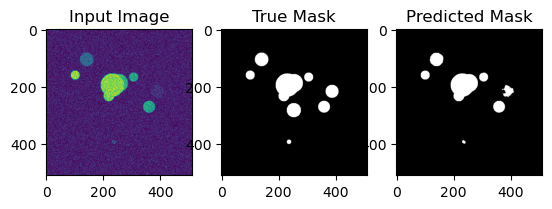

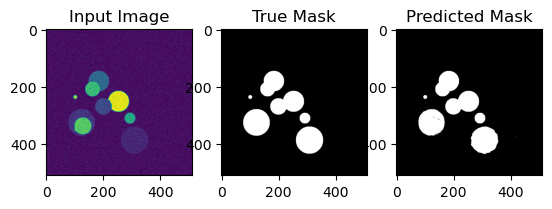

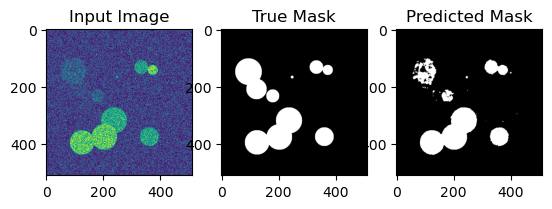

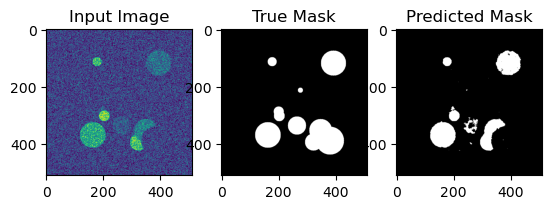

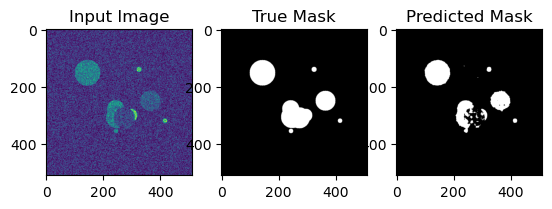

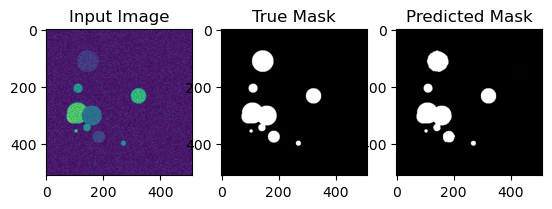

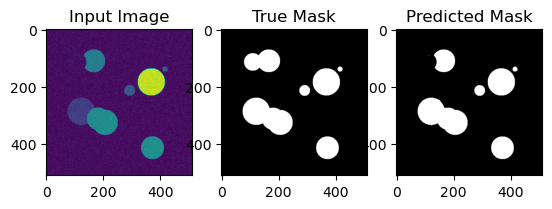

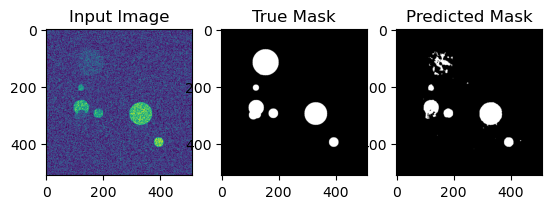

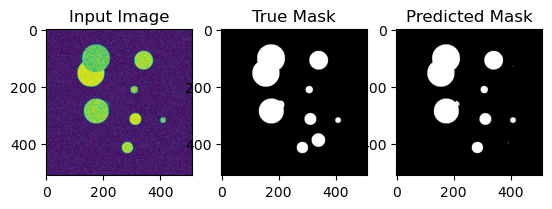

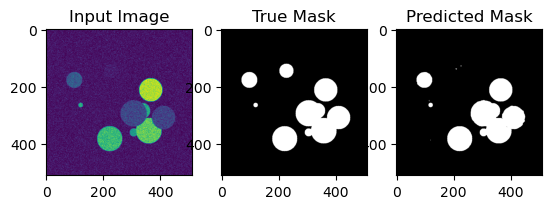

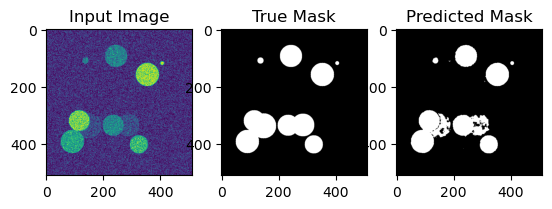

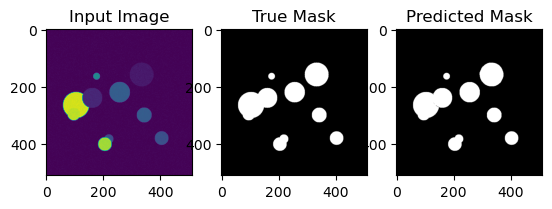

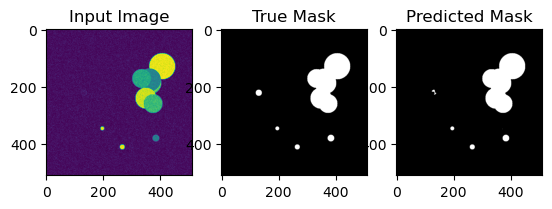

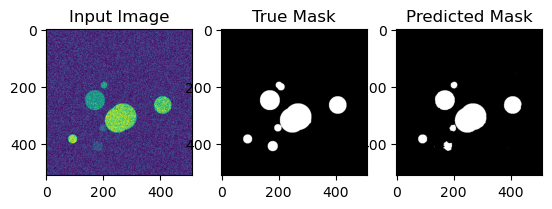

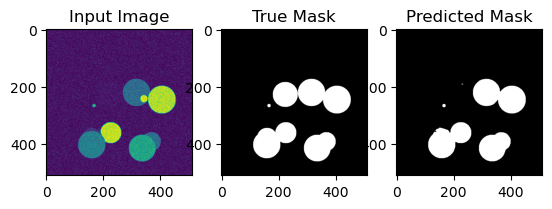

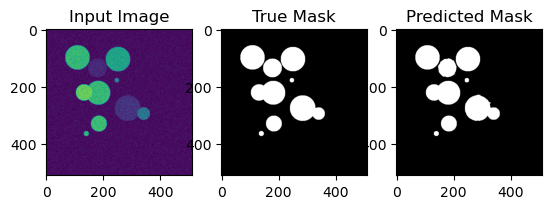

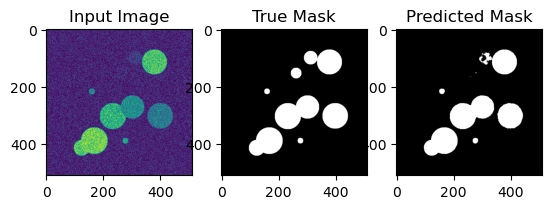

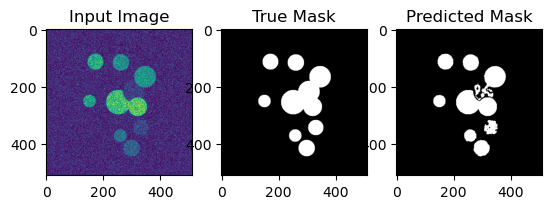

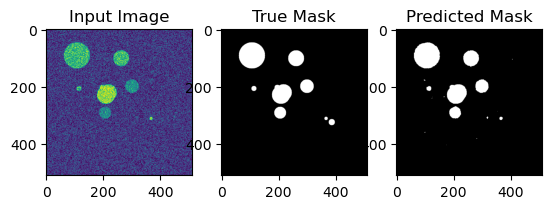

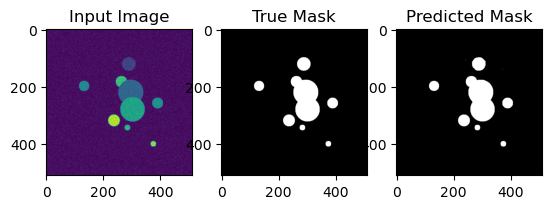

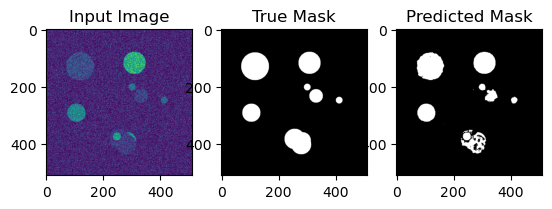

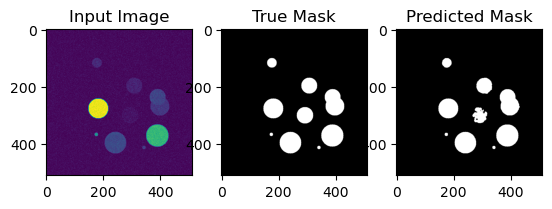

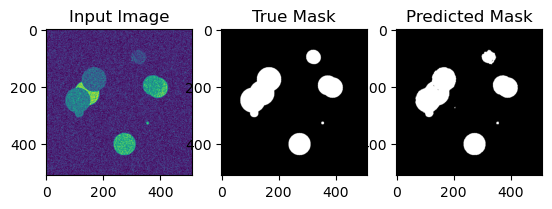

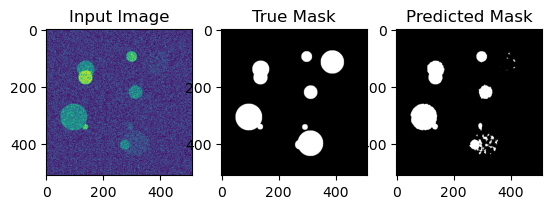

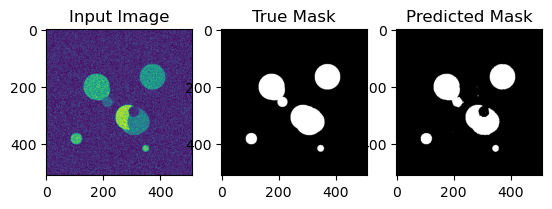

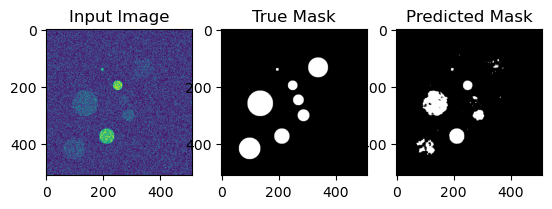

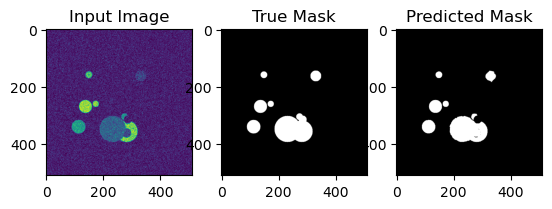

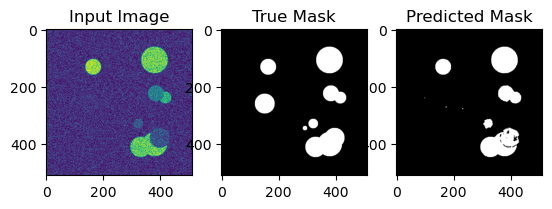

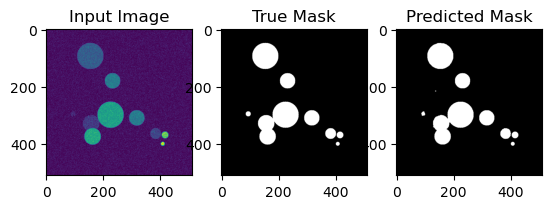

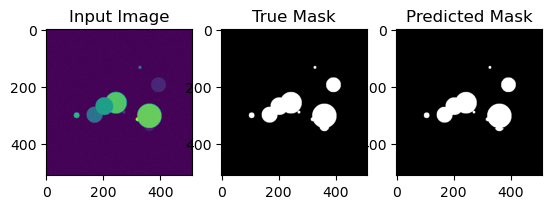

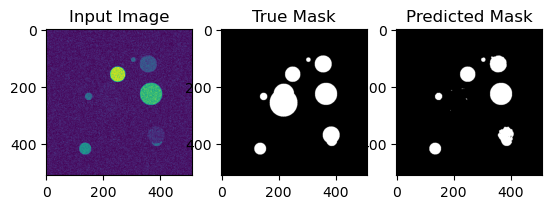

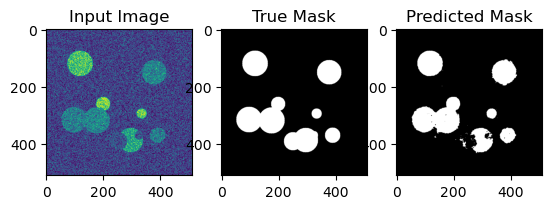

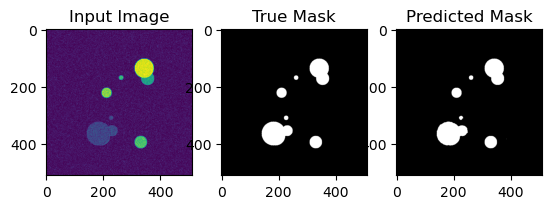

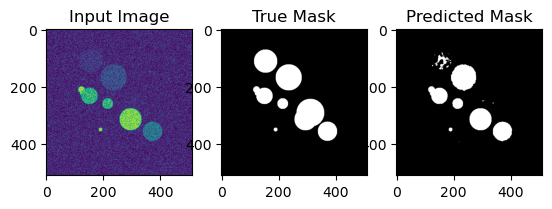

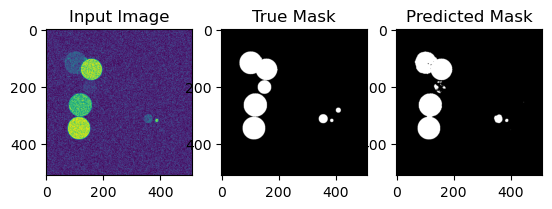

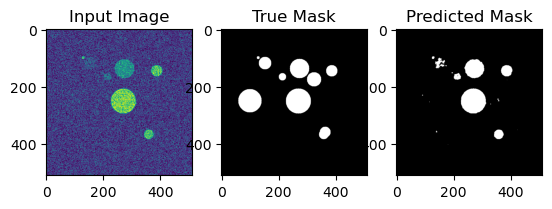

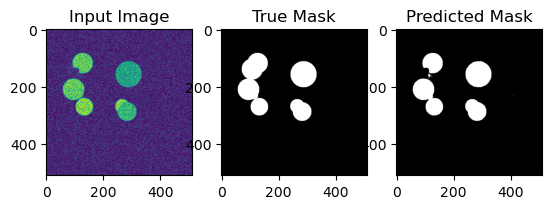

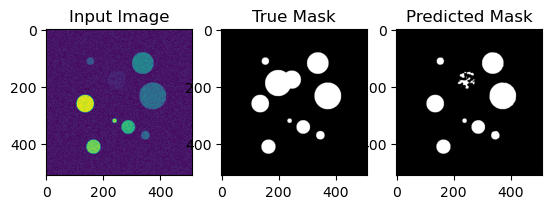

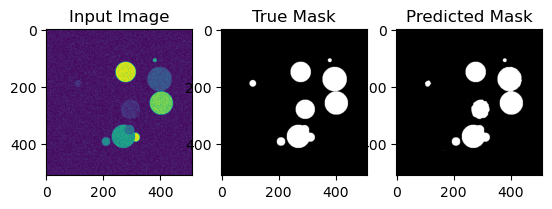

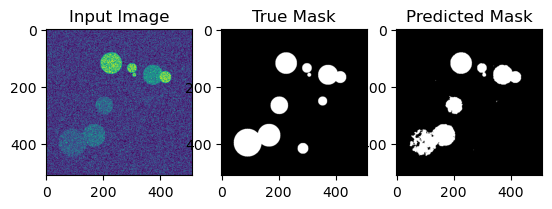

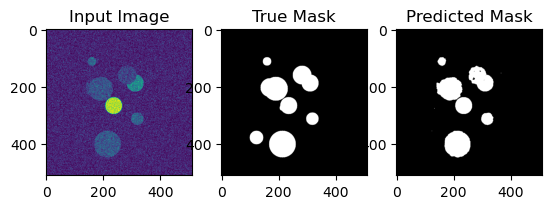

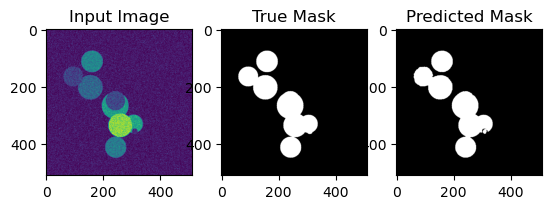

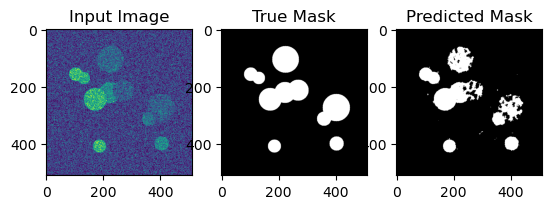

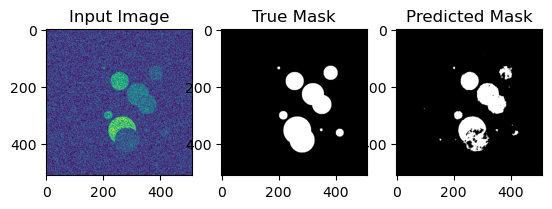

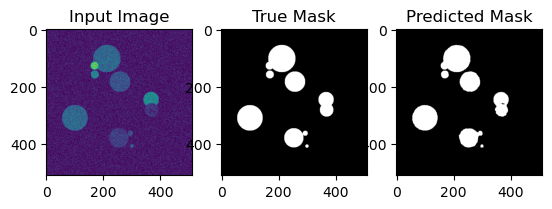

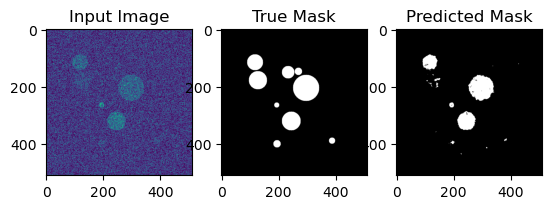

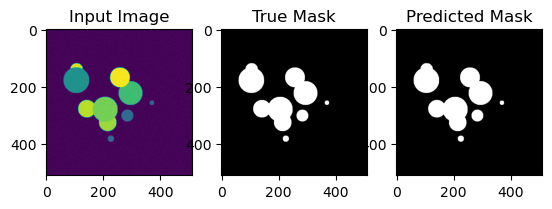

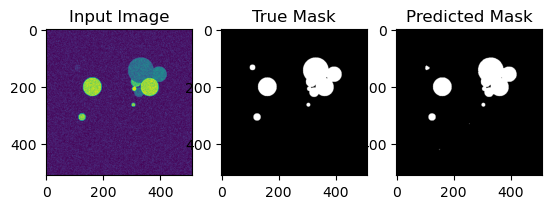

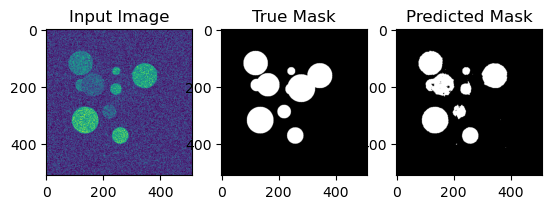

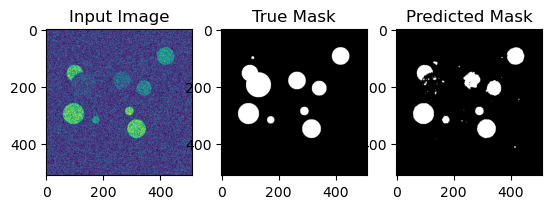

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpqzc6f1ktkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']